# Of primes and queens

## Primes

Load the relevant modules.

In [75]:
import itertools
from math import sqrt

Define a function that checks whether a positive integer is prime.

In [56]:
def is_prime(n):
    return all(map(lambda divisor: n % divisor != 0, range(2, int(sqrt(n)) + 1))) and n > 1

Test the function.

In [57]:
for n in range(21):
    if is_prime(n):
        print(f'{n} is prime')

2 is prime
3 is prime
5 is prime
7 is prime
11 is prime
13 is prime
17 is prime
19 is prime


### Iterator

Define an iterator that returns all prime numbers.

In [66]:
class Primes:
    
    def __init__(self):
        self._n = 1
        
    def __iter__(self):
        return self
    
    def __next__(self):
        self._n += 1
        while not is_prime(self._n):
            self._n += 1
        return self._n

In [70]:
nr_primes = 0
for prime in Primes():
    if nr_primes == 10:
        break
    print(prime)
    nr_primes += 1

2
3
5
7
11
13
17
19
23
29


### Generator function

Define a function using `yield`.  The function will resume after the yielded value has been consumed in the calling context.

In [68]:
def primes():
    n = 2
    while True:
        if is_prime(n):
            yield n
        n += 1    

In [71]:
nr_primes = 0
for prime in primes():
    if nr_primes == 10:
        break
    print(prime)
    nr_primes += 1

2
3
5
7
11
13
17
19
23
29


Note that the state of the function is preserved between calls, hence retaining state.

### Generator

However, things can be even simpler in Python by simply using a generator expression.

In [73]:
for i, prime in enumerate(p for p in range(10000000) if is_prime(p)):
    print(prime)
    if i == 9:
        break

2
3
5
7
11
13
17
19
23
29


Although this is really short, it is also a bit unelegant since the number to range over has to be guessed.

### itertools

The `itertools` module provides many (composable) iterators.

In [76]:
for i, prime in enumerate(p for p in itertools.count(2) if is_prime(p)):
    print(prime)
    if i == 9:
        break

2
3
5
7
11
13
17
19
23
29


It is beyond the scope of this presentation to introduce `itertools` in depth, but it is very much worth exploring.

## $N$ queens

Load the relevant modules.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sys

Consider an $N \times N$ chess board.  We want to place $N$ queens on that board such that none of them can take any of the other $N - 1$ queens.

Note that the usual implementation is uses backtracking explicitly, and requires quite some coding to keep track of the options that have already been explored and those that remain to be checked.  Using `yield` to define a generator allows you to simply program a recursive solution.

Define a function that creates an empty $N \times N$ board. A board is represented as a numpy array, a 0 element represents an empty position on the board, while 1 indicates a queen has been placed on the corresponding square.

In [2]:
def create_board(N):
    return np.zeros((N, N), dtype=np.int)

Define a function that checks whether a given row and column are a safe position to place a queen.

In [40]:
def is_safe_position(board, row, col):
    # check column
    if np.any(board[:row, col]):
        return False
    # row is okay by construction
    N = board.shape[0]
    # check principal diagonal
    for i, j in zip(range(max((0, row - col)), min((N + row - col, N))),
                    range(max((0, col - row)), min((N + col - row, N)))):
        if board[i, j]:
            return False
    # check minor diagonal
    for i, j in zip(range(min((row + col, N - 1)), max((-1, col + row - N - 1)), -1),
                    range(max((0, col + row - N + 1)), min((row + col + 1, N)))):
        if board[i, j]:
            return False
    return True

Note, the function above can be made more efficient since only the upper part of the board should be checked.

Define a function that returns all valid placements of $N$ queens.

In [44]:
def place_queens(board, row=0):
    if row == board.shape[0]:
        yield board
    else:
        for col in range(0, board.shape[1]):
            if is_safe_position(board, row, col):
                board[row, col] = 1
                yield from place_queens(board, row + 1)
                board[row, col] = 0

Define a function to visualize a board.

In [46]:
def vis_board(board):
    N = board.shape[0]
    plt.imshow(board, aspect='equal', interpolation='none', extent=(0, N, 0, N))
    plt.xticks(range(N))
    plt.yticks(range(N))
    plt.grid(True, color='r', linestyle='-', linewidth=1);

For a $3 \times 3$ board, there are no solutions.

In [48]:
board = create_board(3)
for solution in place_queens(board):
    vis_board(solution)
    plt.show()

For a $4 \times 4$ board, there are two solutions.

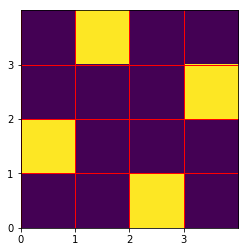

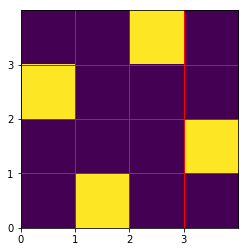

In [37]:
board = create_board(4)
for solution in place_queens(board):
    vis_board(solution)
    plt.show()

More solutions can be found for a $5 \times 5$ board.  In fact, this can be seen as finding a solution for five $4 \tmies 4$ boards.

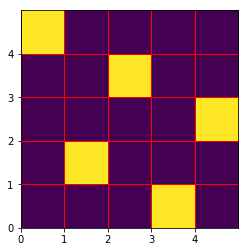

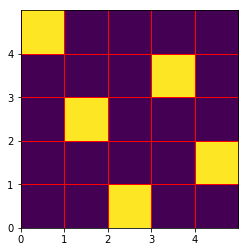

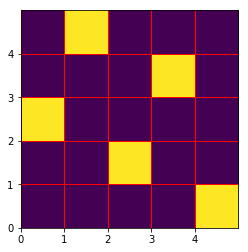

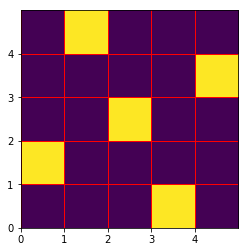

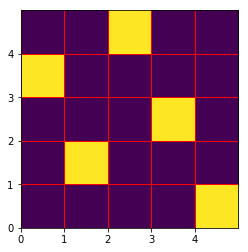

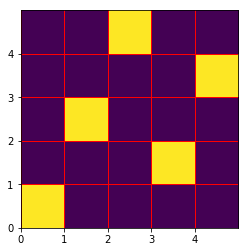

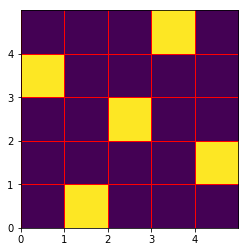

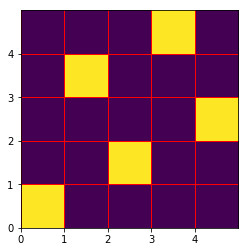

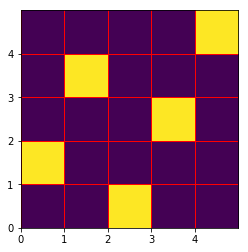

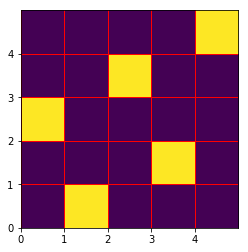

In [47]:
board = create_board(5)
for solution in place_queens(board):
    vis_board(solution)
    plt.show()

Compute the number of solutions for successive board sizes.

In [52]:
for N in range(1, 11):
    nr_solutions = 0
    board = create_board(N)
    for _ in place_queens(board):
        nr_solutions += 1
    print(f'{N} x {N}: {nr_solutions}')

1 x 1: 1
2 x 2: 0
3 x 3: 0
4 x 4: 2
5 x 5: 10
6 x 6: 4
7 x 7: 40
8 x 8: 92
9 x 9: 352
10 x 10: 724
